
<h1 style="text-align:center"> Loan Data from Prosper </h1>
<p style="text-align:center"> By Mohamed Safwan </p>


# Introduction

- Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated loans to more than 870,000 people.

- This data set contains 113,937 loans with 81 variables on each loan,  including loan amount, borrower interest rate, current loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# loading the dataset 
df = pd.read_csv('prosperLoanData.csv')

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Exploring the dataset
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 columns ; 61 columns are numeric and the rest are categories.

### The main features of interest in the dataset:

- Does Prosper give loan based on employment status?
- Does Prosper give out with income as part of their consideration?
- What is the most common occupation of the borrowers?
- what is the borrower's APR for people who has a loan?
- What are factors which can affect the borrower's rate?
- What is the yearly borrower rates?
- Does yearly prosper Score or homeowner affect borrower's rate?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 
> 1. __EmploymentStatus__ -The employment status of the borrower at the time they posted the listing.
> 2.__IncomeRange__ - The income range of the borrower at the time the listing was created.
> 3. __ListingCreationDate__ - The date the listing was created.
> 4. __BorrowerRate__ - The Borrower's interest rate for this loan. 
> 5. __ProsperScore__ - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> 6. __Occupation__ - The Occupation selected by the Borrower at the time they created the listing.
> 7. __IsBorrowerHomeowner__ - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

# Assess and Clean the data

> In this section, I assess and clean the data which will be used through the next sections.

In [6]:
# Creat a copy of the the data frame 
df_clean = df.copy()

# rename the columns to be easier during coding
df_clean.rename(columns=lambda x: x.lower().replace(' ', "").replace('(', "_").replace(')', ""), inplace = True)

# Test
df_clean.columns

Index(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade',
       'term', 'loanstatus', 'closeddate', 'borrowerapr', 'borrowerrate',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating_numeric', 'prosperrating_alpha',
       'prosperscore', 'listingcategory_numeric', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangelower', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'totalcreditlinespast7years', 'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months', 'totalinquiries',
       'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availableban

## Define
> Quality issue: 
Missing values (null) in the column "employmentstatus"

## Code

In [7]:
# check the number of missing values
df_clean.employmentstatus.isnull().sum()

2255

In [8]:
# Check the values of the column
df_clean.employmentstatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64

In [9]:
# fill the null rows with value "unknown"
df_clean.employmentstatus.fillna("Not available", inplace=True)

# test
df_clean.employmentstatus.value_counts()

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64

## Define
> Quality issue: 
Quality issue: Missing values (null) in the column "occupation"

## Code

In [10]:
df_clean.occupation.isnull().sum()

3588

In [11]:
df_clean.occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: occupation, Length: 67, dtype: int64

In [12]:
# fill the null rows with value "Other" at the occupation column
df_clean.occupation.fillna('Other', inplace=True)

# test
df_clean.occupation.isnull().sum()

0

## Define 
`listingcreationdate` column's type is "object", it should be datetime  

## Code

In [13]:
#  convert the column to date and time then remove the seconds part
df_clean.listingcreationdate = pd.to_datetime(df_clean.listingcreationdate, format="%Y-%m-%d %H:%M:%S").dt.floor('T')

# Test
df_clean.listingcreationdate.sample(2)

94638    2008-08-21 14:30:00
104983   2013-11-17 09:16:00
Name: listingcreationdate, dtype: datetime64[ns]

# Univariate Exploration

> In this section, I investigate distributions of individual variables.

## Employment Status
The employment status of the borrower at the time they posted the listing.<br>

Does Prosper give loan based on employment status?

In [14]:
df_clean.employmentstatus.value_counts()

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64

In [15]:
# count plot function 
def count_plot(data,color, x_ = None, y_=None):
    
    if x_:
        plt.figure(figsize=[8, 5])
        sb.countplot(data = data, x = x_.replace(' ',"").lower(),color = sb.color_palette()[color],
                     order=data[x_.replace(' ',"").lower()].value_counts().index)
        plt.title(x_ + "Distribution")
        plt.ylabel('Count')
        plt.xlabel(x_)
        plt.xticks(rotation=45)
    if y_:
        plt.figure(figsize=[11,15])
        sb.countplot(data = data, y=y_.replace(' ',"").lower(),color = sb.color_palette()[color],
                     order=data[y_.replace(' ',"").lower()].value_counts().index)
        plt.xscale('log')
        plt.title(y_ + "Distribution")
        plt.ylabel(y_)
        plt.xlabel('Count');

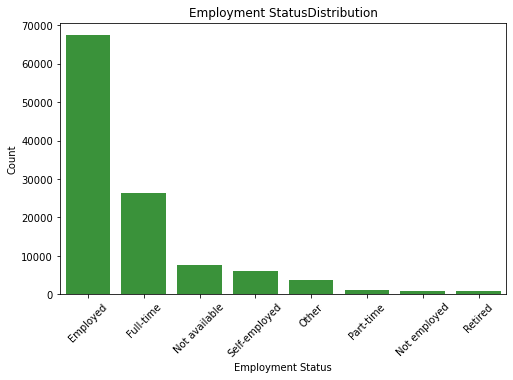

In [16]:
# plot the result
count_plot(df_clean,2,'Employment Status')

The plot shows that unemployed , part time and retired individuals can rarely obtain a loan from Prosper.<br>
It is most common that employed and full time individuals obtain a loan from Porsper.

## Income Range
The income range of the borrower when the listing was created.<br>

Does Prosper take the individual's income as part of their consideration to give him a loan?


In [17]:
df_clean.incomerange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: incomerange, dtype: int64

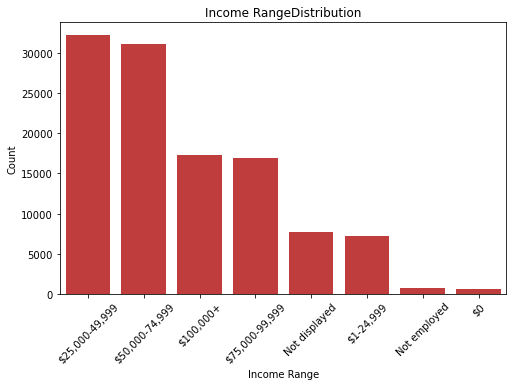

In [18]:
# plot the result
count_plot(df_clean, 3,'Income Range')

The plot shows that most individuals who have loans have an income range from 25k to 75k.
It is clear that Prosper takes the income rang into consideration to approve a loan.

## Occupation
The Occupation selected by the Borrower at the time they created the listing.<br>

What is the most common occupation of the borrowers?

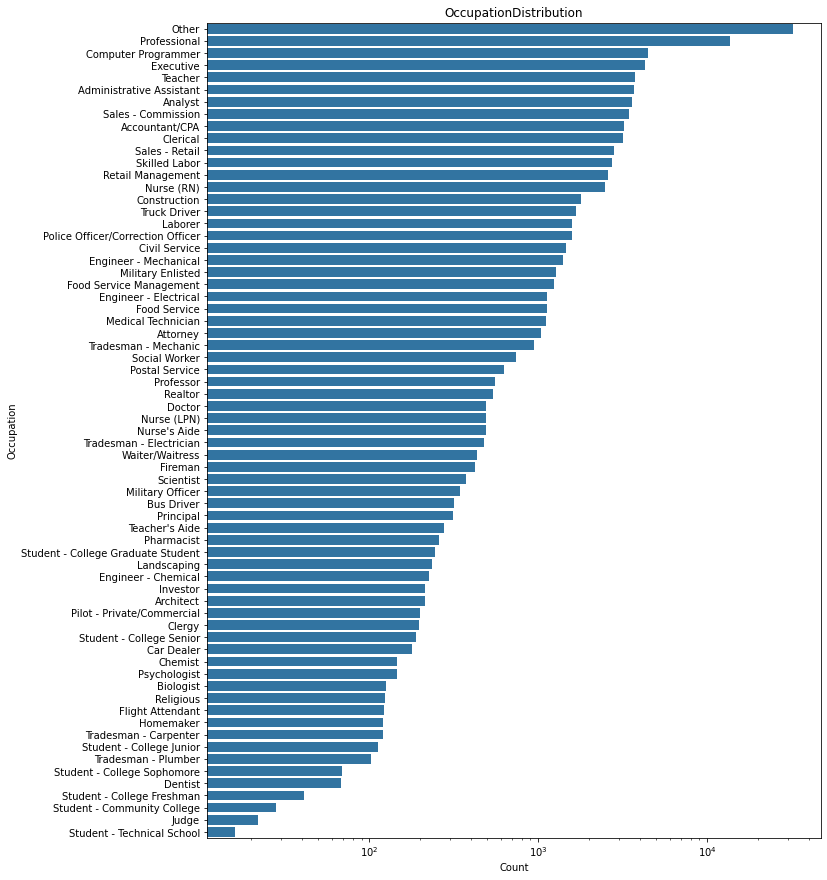

In [19]:
# plot the result
count_plot(df_clean, 0, y_='Occupation')


By neglecting the "Other" and "Professional" categories, We can notice that computer programmer, executive and administrative assistant are the most common occupations of the borrowers.

## Borrower Rate
The Borrower's interest rate for the loan.<br>


What is the borrower's APR for people who has a loan?

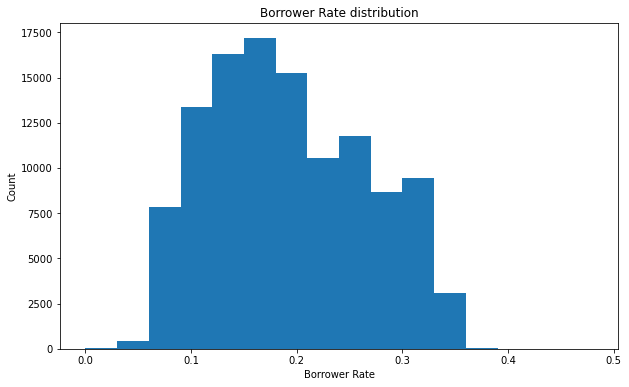

In [20]:
# plot a histogram to show the borrow rate distribution
plt.figure(figsize=[10, 6])
bins_ = np.arange(0,df_clean['borrowerrate'].value_counts().index.max(),0.03)
plt.hist(data = df_clean, x = 'borrowerrate', bins = bins_)

plt.title('Borrower Rate distribution')
plt.xlabel('Borrower Rate')
plt.ylabel('Count');



The plot is almost identical to that of BorrowerAPR, just shifted left a bit.<br>
The peak is at around 0.17 , which is the highest peak.

## Univariate Analysis Conclusion

The main  interest factor of my analysis is in the borrower's rate.<br>

Employment Status is also an interesting parameter as the plot shows that unemployed , part time and retired individuals can rarely obtain a loan from Prosper.<br>

Other interesting variables include occupations, We can notice that computer programmer, executive and administrative assistant are the most common occupations of the borrowers and have the highest frequency, monthly loan payment and employment status.

# Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.


## Borrower Rate vs. Employment status
I want to find out the relationship between the borrower's rate and the employment status.<br>
Does Prosper determine the rate based on employment status?

In [21]:
# Bivariate plot Function 
def bivar_plt(data, x_, y_, color, order=None):
   
    plt.figure(figsize=[15, 8])
    sb.violinplot(data = data, x = x_.replace(' ','').lower(),
                  y = y_.replace(' ','').lower(), color=sb.color_palette()[color], order=order)
    plt.title(x_ + " vs. " + y_)
    plt.ylabel(y_)
    plt.xlabel(x_)
    plt.xticks(rotation=45)
    

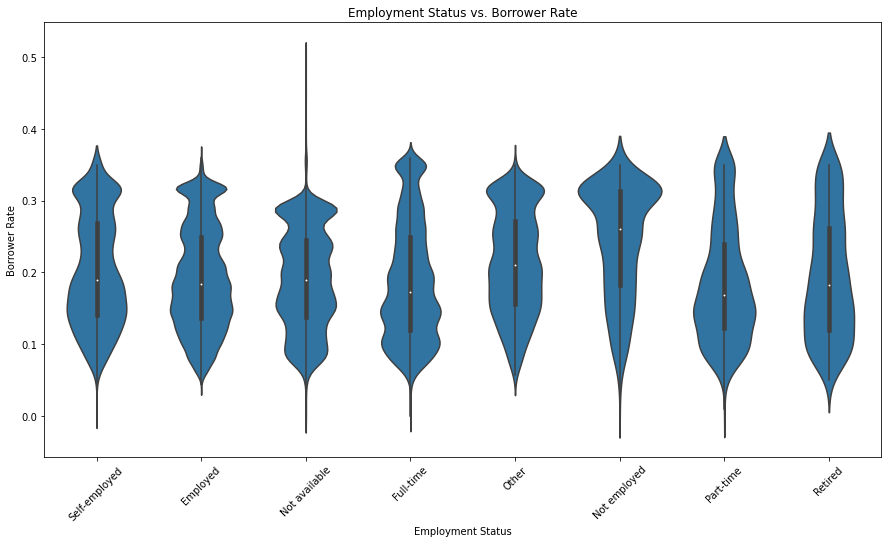

In [22]:
# Bivariate plot of  employment status and borrower rate
bivar_plt(df_clean, 'Employment Status', 'Borrower Rate', 0)

Individual who is employed don't necessarily have low borrower rate.<br>
Unemployment individual has a high median rate and high concentrate frequency above the median.

## Borrower Rate vs Income Range
I want to find out the relationship between the borrower's rate and income range. <br>
Does Prosper determine the rate based on income range?

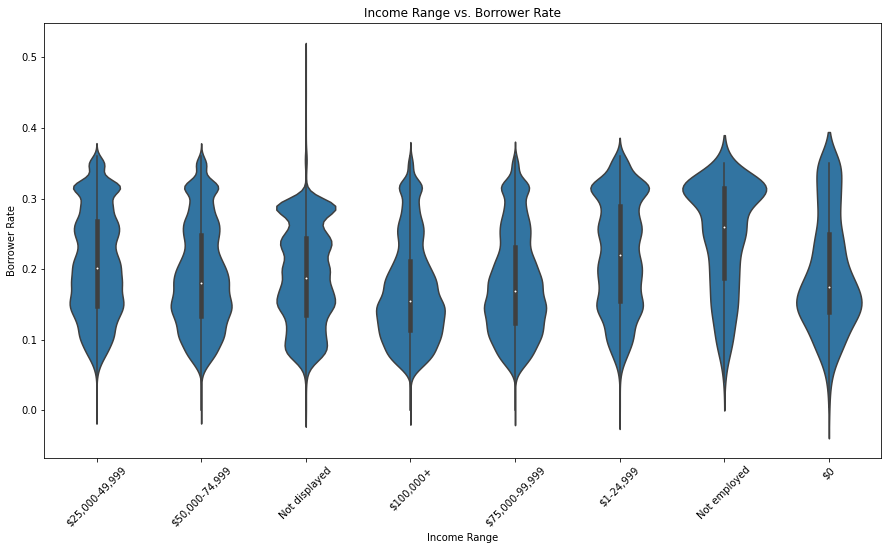

In [23]:
# Bivariate plot of  income range and borrower rate
bivar_plt(df_clean, 'Income Range', 'Borrower Rate', 0)

The higher the income range is, the lower the borrower rate is.<br>
The income range could be a factor used to determine how much the borrower rate would be.

## Occupation against borrower rate
Does occupation affect a borrower's rate?

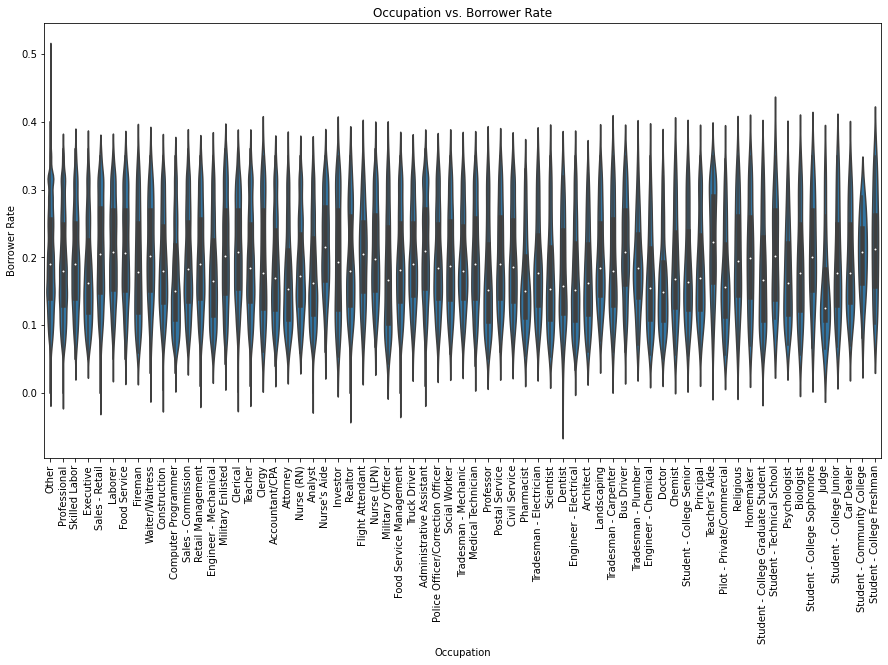

In [24]:
# Bivariate plot of  occupation and borrower rate
bivar_plt(df_clean, 'Occupation', 'Borrower Rate', 0)
plt.xticks(rotation = '90');

The plot shows that:
- Administrative Assistant and clerical have a high median rate, while analyst has a low median rate.
- occupation with lower average salary -such as clerical, teacher's aide, bus driver and nurse's aid- has a high median rate.
- Occupation could be factor used to determine how much the borrower rate would be.

## Yearly Borrower Rates
What is the yearly borrower rates?<br>
Does the borrow rate increase by time?<br>

In [25]:
# Creat a new column for listing creation year
df_clean['listingcreationyear'] = df_clean.listingcreationdate.dt.year

In [35]:
# Box plot function
def box_plt(data, x_title, y_title, color, hue_=None):
    plt.figure(figsize=[10, 8])
    sb.boxplot(data = data, x = x_title.replace(' ',"").lower(), y = y_title.replace(' ',"").lower(),
               hue = hue_, color = sb.color_palette()[color])
    plt.ylabel(y_title)
    plt.xlabel(x_title);

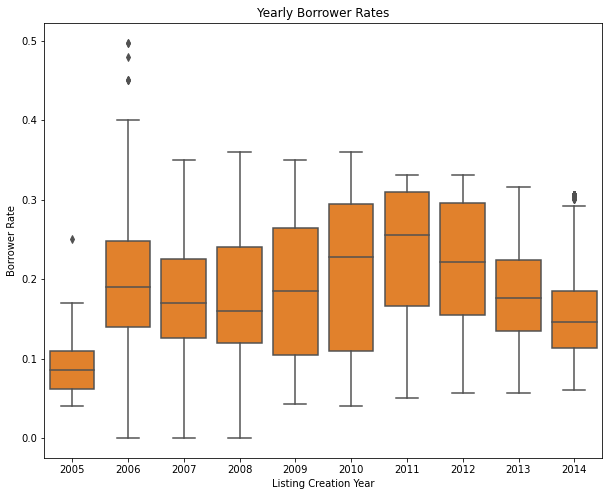

In [36]:
# plot the yearly borrower rates
box_plt(df_clean, 'Listing Creation Year', 'Borrower Rate', 1)
plt.title('Yearly Borrower Rates');


The plot shows that:
- The year 2005 represents the minimum average borrower rate.
- Borrower rate goes up after 2008 until 2011.
- Since 2011, the rate started going down until 2014.

## Borrower rates vs. Prosper Score
Is Prosper Score considered an factor to determine the borrower rate?

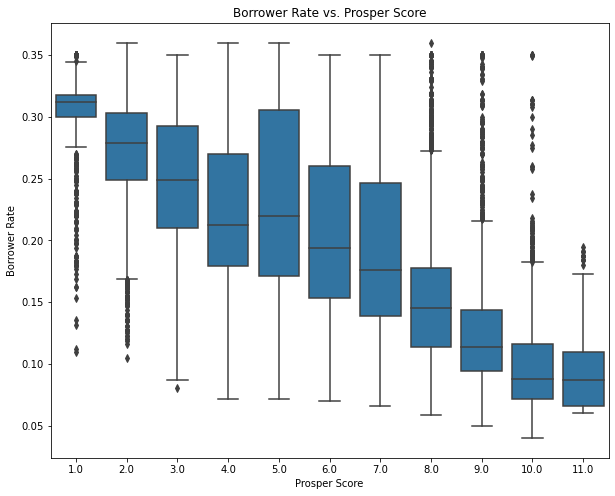

In [38]:
# plot the borrower rates vs prosper score
box_plt(df_clean, 'Prosper Score', 'Borrower Rate', 0)
plt.title('Borrower Rate vs. Prosper Score');

This plot shows that:
- There is a strong correlation between the prosper score with the  borrower rate.
- The higher the prosper score is, the lower the borrower rate is.
- The prosper score is a an important factor to determinate the borrower rate.

## Bivariate Analysis Conclusion
I have created a new column named `listingcreationyear` to capture the year of the loan created to plot a the yearly borrower rate; The graph shows that borrower rate has been decreasing after 2008 until 2011.<br>

The plot of borrower's rate against occupation shows occupation with lower average salary -such as clerical, teacher's aide, bus driver and nurse's aid- has a high median rate.<br>

The boxplot of borrower's rate against ProsperScore really gives a strong insight into a trend. The higher the prosper score is, the lower the borrower rate is.<br>
It has a strong indication that Prosper Score is one of the main factors when derterming the borrower's rate.

# Multivariate Exploration

> In this section I create plots of three or more variables to investigate the data.

### Yearly Borrower rate vs. Home-owner
Does being a homeowner affect borrower rate?

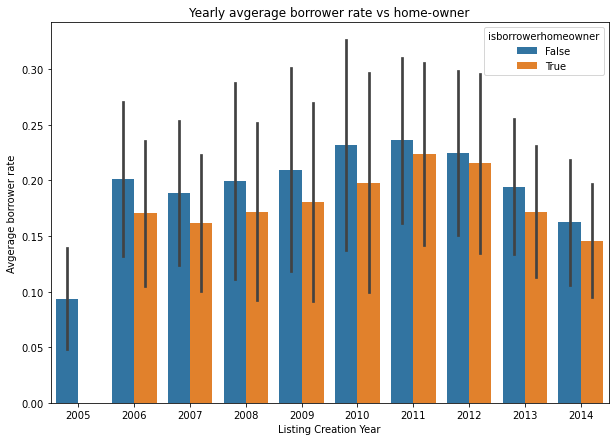

In [46]:

plt.figure(figsize=[10, 7])
sb.barplot(data = df_clean, x = 'listingcreationyear', y = 'borrowerrate',
           hue = 'isborrowerhomeowner', ci = 'sd')
plt.xlabel('Listing Creation Year')
plt.ylabel('Avgerage borrower rate')
plt.title('Yearly avgerage borrower rate vs home-owner');

The plot shows that homeowners always have alower rate than non-homeowners.

### Year Borrower Rate vs. Prosper Score vs. Is_HomeOwner
Does yearly prosper Score and homeowner affect borrower's rate?

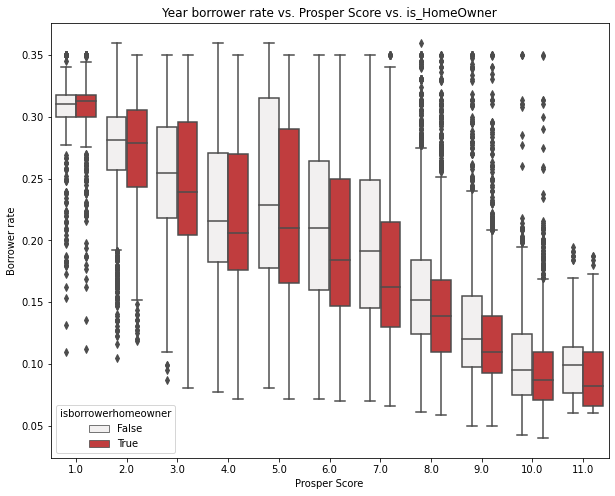

In [47]:
# plot the borrower rates vs prosper score
box_plt(df_clean, 'Prosper Score', 'Borrower rate', 3, 'isborrowerhomeowner')
plt.title('Year borrower rate vs. Prosper Score vs. is_HomeOwner');

The trend here is similar to the previous graph. I notice that for score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.

### Multivariate Exploration Conclusion
 
In the bar plot graph it is clear that homeowners always have a lower rate than non-homeowners but when we take the prosper score into our cosideration we can notice that for score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.
